In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from matplotlib.ticker import StrMethodFormatter

#import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
#import different methods
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [94]:
# static module
import scipy
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import itertools
import warnings 
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'statsmodels'

In [69]:
sklearn.__version__

'0.20.3'

In [88]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

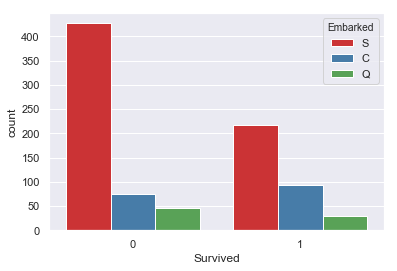

In [89]:
### explore data
## under the help of seaborn
# survive & embarked
sns.set(style='darkgrid')
sns.countplot(x='Survived', data=train_df, hue='Embarked', palette='Set1')

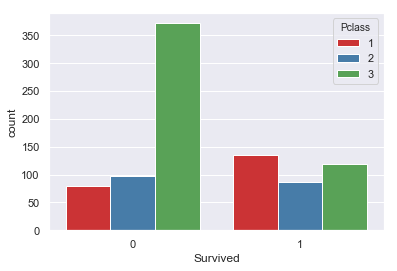

In [90]:
# survive & Pclass
sns.set(style='darkgrid')
sns.countplot(x='Survived', data=train_df, hue='Pclass', palette='Set1')

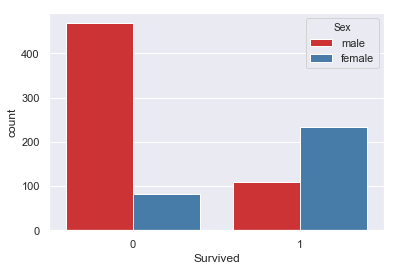

In [91]:
# survive & Pclass
sns.set(style='darkgrid')
sns.countplot(x='Survived', data=train_df, hue='Sex', palette='Set1')

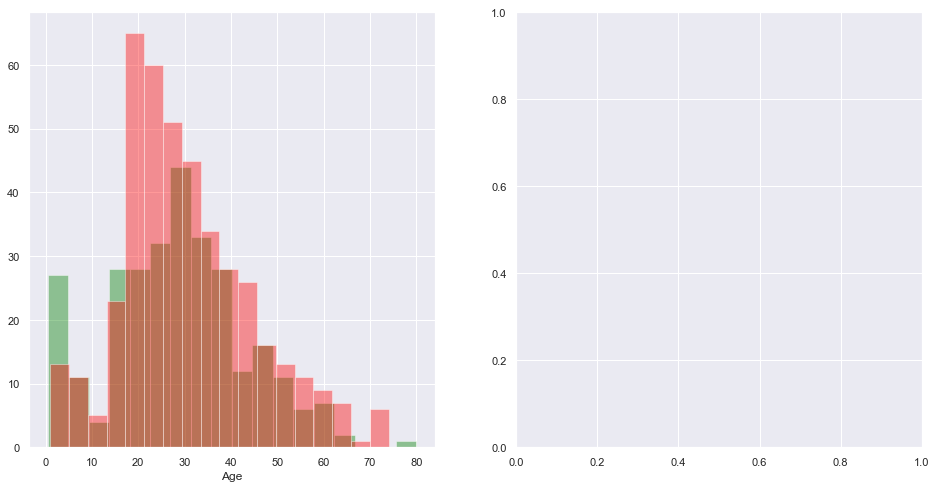

In [107]:
# survive & age
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax = sns.distplot(train_df[train_df['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde=False, color='green')
ax = sns.distplot(train_df[train_df['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = axes[0], kde=False, color='red')

In [102]:
sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde=False, color='green')

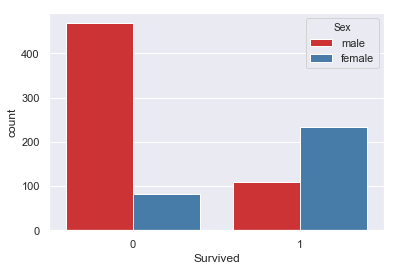

In [98]:
# survive & Pclass
sns.set(style='darkgrid')
sns.distplot(x='Survived', data=train_df, hue='Sex', palette='Set1')

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [35]:
# clean data

# trans string sex to integer
def trans_sex(sex):
    if sex == "male":
        return 1
    else:
        return 2
train_df["gender"] = train_df["Sex"].apply(lambda x: trans_sex(x))
test_df["gender"] = test_df["Sex"].apply(lambda x: trans_sex(x))
# print(train_df["gender"])

# del the Name
del train_df["Name"]
del test_df["Name"]

# del the Ticket, because I don't know what is it
del train_df["Ticket"]
del test_df["Ticket"]

# del the variable cabin
del train_df["Cabin"]
del test_df["Cabin"]

# trans embarked
def trans_embarked(embarked):
    if embarked == "S":
        return 1
    elif embarked == "C":
        return 2
    else:
        return 3

train_df["embarked_code"] = train_df["Embarked"].apply(lambda x: trans_embarked(x))
test_df["embarked_code"] = test_df["Embarked"].apply(lambda x: trans_embarked(x))

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         889 non-null object
gender           891 non-null int64
embarked_code    891 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 76.6+ KB


In [36]:
# del two trans variables
del train_df["Sex"]
del train_df["Embarked"]

del test_df["Sex"]
del test_df["Embarked"]

NameError: name 'trans_df' is not defined

In [39]:
# set index
train_df = train_df.set_index("PassengerId")
test_df = test_df.set_index("PassengerId")

In [49]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
gender           891 non-null int64
embarked_code    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
Pclass           418 non-null int64
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null float64
Embarked         418 non-null object
gender           418 non-null int64
embarked_code    418 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 32.7+ KB


In [47]:
# fill nan value
train_df = train_df.fillna(99)
test_df =test_df.fillna(99)

In [52]:
train, test = train_test_split(train_df)

In [53]:
y_train = train["Survived"]
y_test = test["Survived"]

X_train = train
del X_train["Survived"]

X_test = test
del X_test["Survived"]

In [66]:
### Logistic Regression
# default parameter

lg = LogisticRegression().fit(X_train, y_train)
y_pred_1 = lg.predict(X_test)
pred_score = lg.score(X_test, y_test)
print("The pred_score at default parameter is %s" % pred_score)
coef_1_list = lg.coef_.tolist()[0]
print(X_train.columns)
print("coefficient: %s" % coef_1_list)

The pred_score at default parameter is 0.7892376681614349
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-1.1119491581657275, -0.008143399703237507, -0.14255952076880443, -0.06398796189364012, 0.00028737823448438154, 2.6461000090561835, 0.33551728511846435]


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
# What we knew is that female (gender = 2) and young children were most likely survived

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')

In [67]:
### Logistic Regression
## parameter
# C: float, default 1. Smaller C, stronger regularization
# penalty: l1, l2(default)
# solver: newton-cg, lbfgs, liblinear(default), sag, saga
C_list = [0.01, 0.1, 1, 10, 100] 
for c in C_list:
    lg = LogisticRegression(C=c, solver="liblinear").fit(X_train, y_train)
    # y_pred = lg.predict(X_test)
    pred_score = lg.score(X_test, y_test)
    print("The C: %s, the pred_score: %s" % (c, pred_score))
    coef_1_list = lg.coef_.tolist()[0]
    print(X_train.columns)
    print("coefficient: %s" % coef_1_list)

The C: 0.01, the pred_score: 0.6860986547085202
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-0.44194224762338935, -0.008979868001736556, -0.09046072653756604, 0.01722651130837276, 0.007044831918188044, 0.492504863342369, 0.09727622750632647]
The C: 0.1, the pred_score: 0.7488789237668162
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-0.9930379433640388, -0.009197960757383347, -0.11854699658663181, 0.0058478783707549414, 0.0001484062714917378, 1.7471661275960393, 0.24899385972685675]
The C: 1, the pred_score: 0.7892376681614349
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-1.1119491581657275, -0.008143399703237507, -0.14255952076880443, -0.06398796189364012, 0.00028737823448438154, 2.6461000090561835, 0.33551728511846435]
The C: 10, the pred_score: 0.7892376681614349
Index(['Pclass', 'Age', 'SibSp', '

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [84]:
### variable age has lots of missing value, try to ignore them

## read data
train_df2 = pd.read_csv("train.csv")
test_df2 = pd.read_csv("test.csv")

## clean data
# trans string sex to integer
train_df2["gender"] = train_df2["Sex"].apply(lambda x: trans_sex(x))
test_df2["gender"] = test_df2["Sex"].apply(lambda x: trans_sex(x))

# delete variable age
del train_df2["Age"]
del test_df2["Age"]

# fill nan value with 0
train_df2 = train_df2.fillna(0)
test_df2 = test_df2.fillna(0)

# del the Name
del train_df2["Name"]
del test_df2["Name"]

# del the Ticket, because I don't know what is it
del train_df2["Ticket"]
del test_df2["Ticket"]

# del the variable cabin
del train_df2["Cabin"]
del test_df2["Cabin"]

# trans embarked
train_df2["embarked_code"] = train_df2["Embarked"].apply(lambda x: trans_embarked(x))
test_df2["embarked_code"] = test_df2["Embarked"].apply(lambda x: trans_embarked(x))

# del two trans variables
del train_df2["Sex"]
del train_df2["Embarked"]

del test_df2["Sex"]
del test_df2["Embarked"]

# set index
train_df2 = train_df2.set_index("PassengerId")
test_df2 = test_df2.set_index("PassengerId")

train, test = train_test_split(train_df2)

y_train2 = train["Survived"]
y_test2 = test["Survived"]

X_train2 = train
del X_train2["Survived"]

X_test2 = test
del X_test2["Survived"]

In [85]:
# use dataset2
C_list = [0.01, 0.1, 1, 10, 100] 
for c in C_list:
    lg = LogisticRegression(C=c, solver="liblinear").fit(X_train2, y_train2)
    # y_pred = lg.predict(X_test)
    pred_score = lg.score(X_test2, y_test2)
    print("The C: %s, the pred_score: %s" % (c, pred_score))
    coef_list = lg.coef_.tolist()[0]
    print(X_train2.columns)
    print("coefficient: %s" % coef_list)

The C: 0.01, the pred_score: 0.7040358744394619
Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-0.45782728907276266, -0.1001509212308935, 0.03870586090112615, 0.006572669986584973, 0.4587768658172195, -0.005062589516582954]
The C: 0.1, the pred_score: 0.7757847533632287
Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-0.8839779351502687, -0.16804602786655637, 0.04758671432246214, 0.0014431111581316137, 1.6725737375516576, 0.011829850228773305]
The C: 1, the pred_score: 0.7937219730941704
Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-0.8985538099595541, -0.23675213155158498, -0.030476518946157313, 0.0025469090446379964, 2.54285228013227, 0.05980520573244905]
The C: 10, the pred_score: 0.7937219730941704
Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-0.8647917147282471, -0.

In [82]:
### variable age has lots of missing value, delete it

## read data
train_df3 = pd.read_csv("train.csv")
test_df3 = pd.read_csv("test.csv")

## clean data
# trans string sex to integer
train_df3["gender"] = train_df3["Sex"].apply(lambda x: trans_sex(x))
test_df3["gender"] = test_df3["Sex"].apply(lambda x: trans_sex(x))

# delete variable age
del train_df3["Age"]
del test_df3["Age"]

# fill nan value with 0
train_df3 = train_df3.fillna(0)
test_df3 = test_df3.fillna(0)

# del the Name
del train_df3["Name"]
del test_df3["Name"]

# del the Ticket, because I don't know what is it
del train_df3["Ticket"]
del test_df3["Ticket"]

# del the variable cabin
del train_df3["Cabin"]
del test_df3["Cabin"]

# trans embarked
train_df3["embarked_code"] = train_df3["Embarked"].apply(lambda x: trans_embarked(x))
test_df3["embarked_code"] = test_df3["Embarked"].apply(lambda x: trans_embarked(x))

# del two trans variables
del train_df3["Sex"]
del train_df3["Embarked"]

del test_df3["Sex"]
del test_df3["Embarked"]

# set index
train_df3 = train_df3.set_index("PassengerId")
test_df3 = test_df3.set_index("PassengerId")

train, test = train_test_split(train_df3)

y_train3 = train["Survived"]
y_test3 = test["Survived"]

X_train3 = train
del X_train3["Survived"]

X_test3 = test
del X_test3["Survived"]

In [83]:
# use dataset3
C_list = [0.01, 0.1, 1, 10, 100] 
for c in C_list:
    lg = LogisticRegression(C=c, solver="liblinear").fit(X_train3, y_train3)
    # y_pred = lg.predict(X_test)
    pred_score = lg.score(X_test3, y_test3)
    print("The C: %s, the pred_score: %s" % (c, pred_score))
    coef_list = lg.coef_.tolist()[0]
    print(X_train2.columns)
    print("coefficient: %s" % coef_list)

The C: 0.01, the pred_score: 0.726457399103139
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-0.44719693392780857, -0.09747017612475242, 0.0490555273354275, 0.005929467520084539, 0.44006168341330426, -0.004830807546558353]
The C: 0.1, the pred_score: 0.7937219730941704
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-0.8625378887071137, -0.15207030614444322, 0.04610642411345069, 0.0008870358388404214, 1.6316040970994583, 0.06281954648724501]
The C: 1, the pred_score: 0.7982062780269058
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: [-0.8620106504885556, -0.20238417582037688, -0.0479473886033367, 0.002006758922128004, 2.4920892782124384, 0.15574877390623743]
The C: 10, the pred_score: 0.8026905829596412
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'embarked_code'], dtype='object')
coefficient: